Cleaned data loaded
Fraud distribution:
 is_fraud
0    0.998333
1    0.001667
Name: proportion, dtype: float64


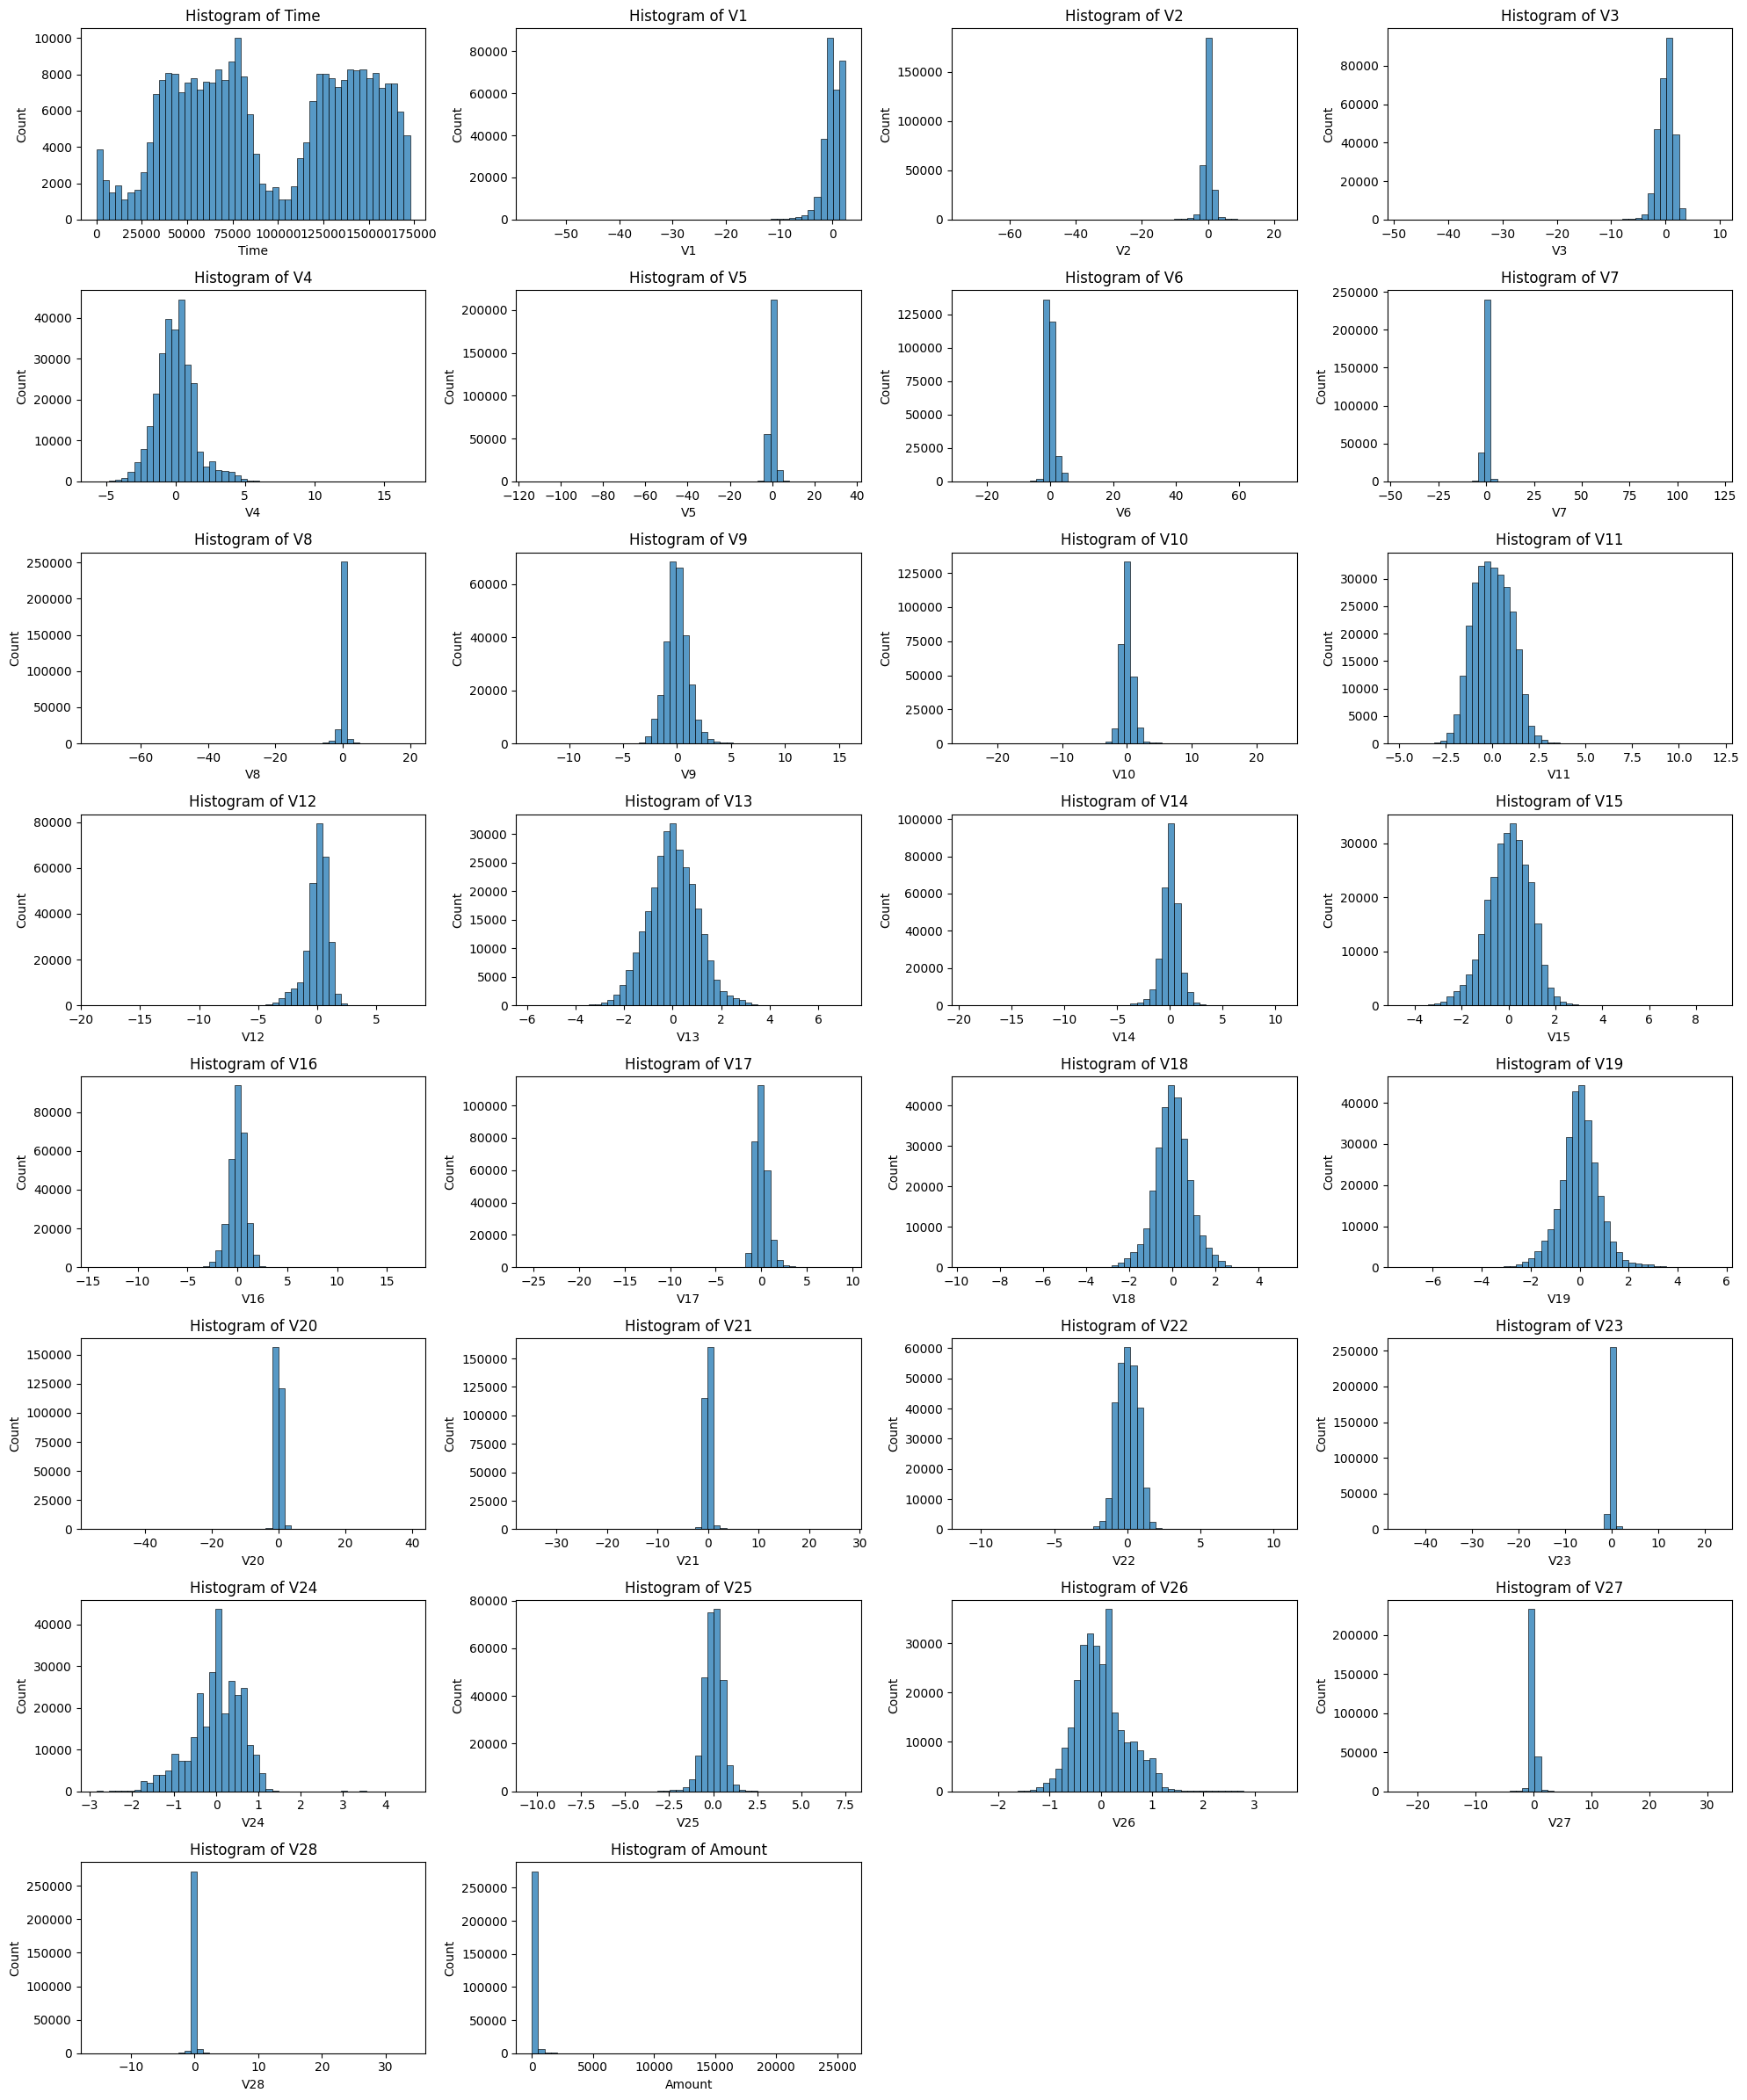

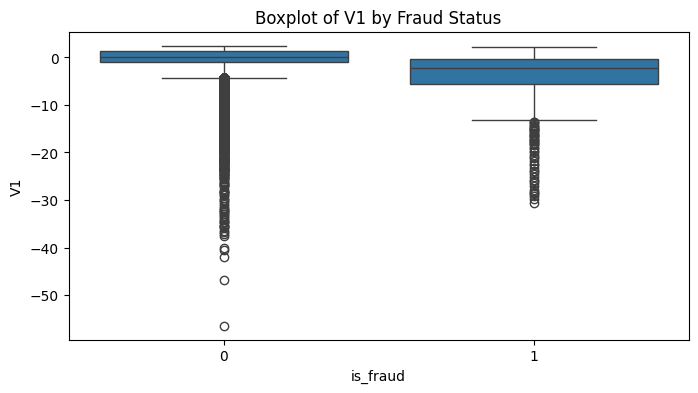

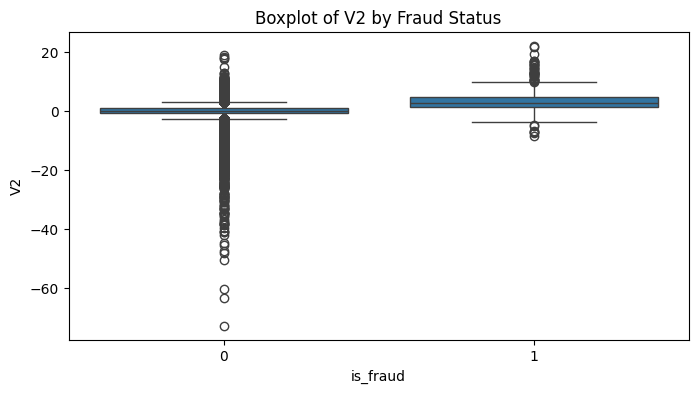

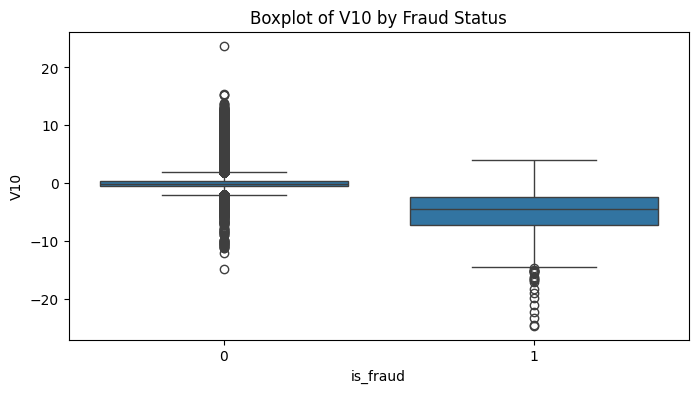

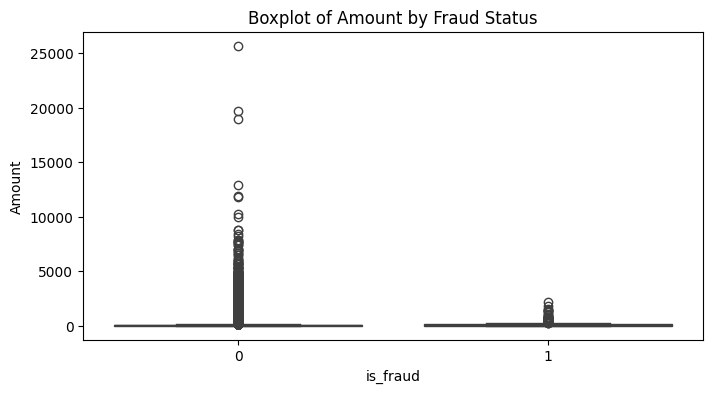

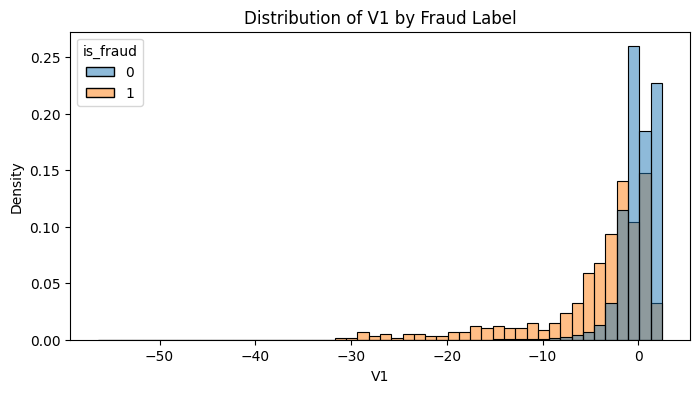

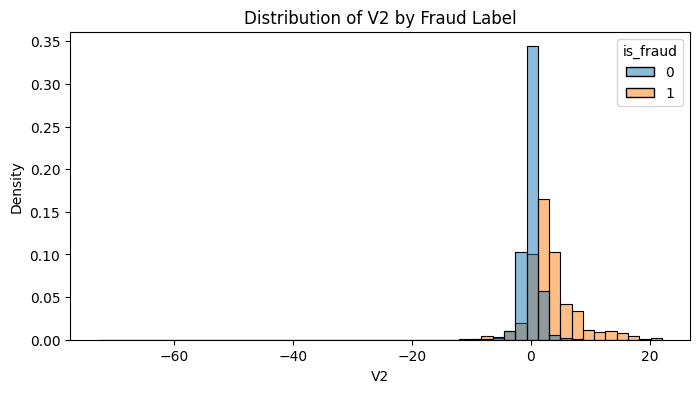

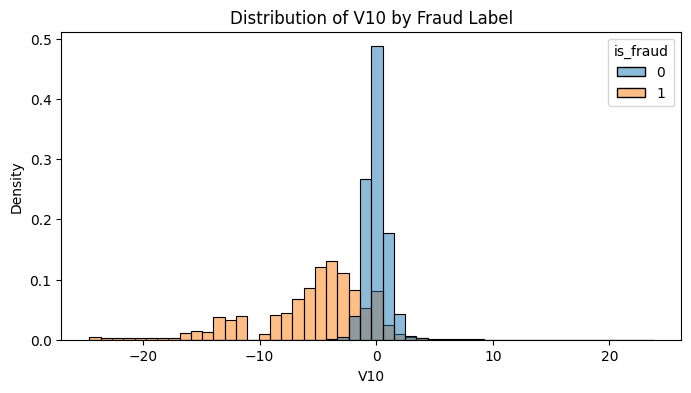

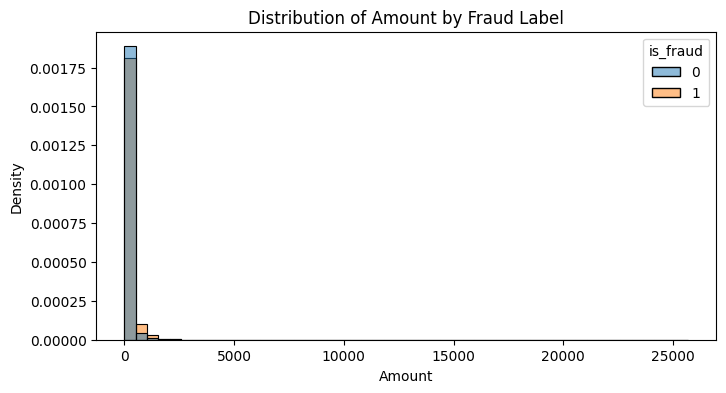

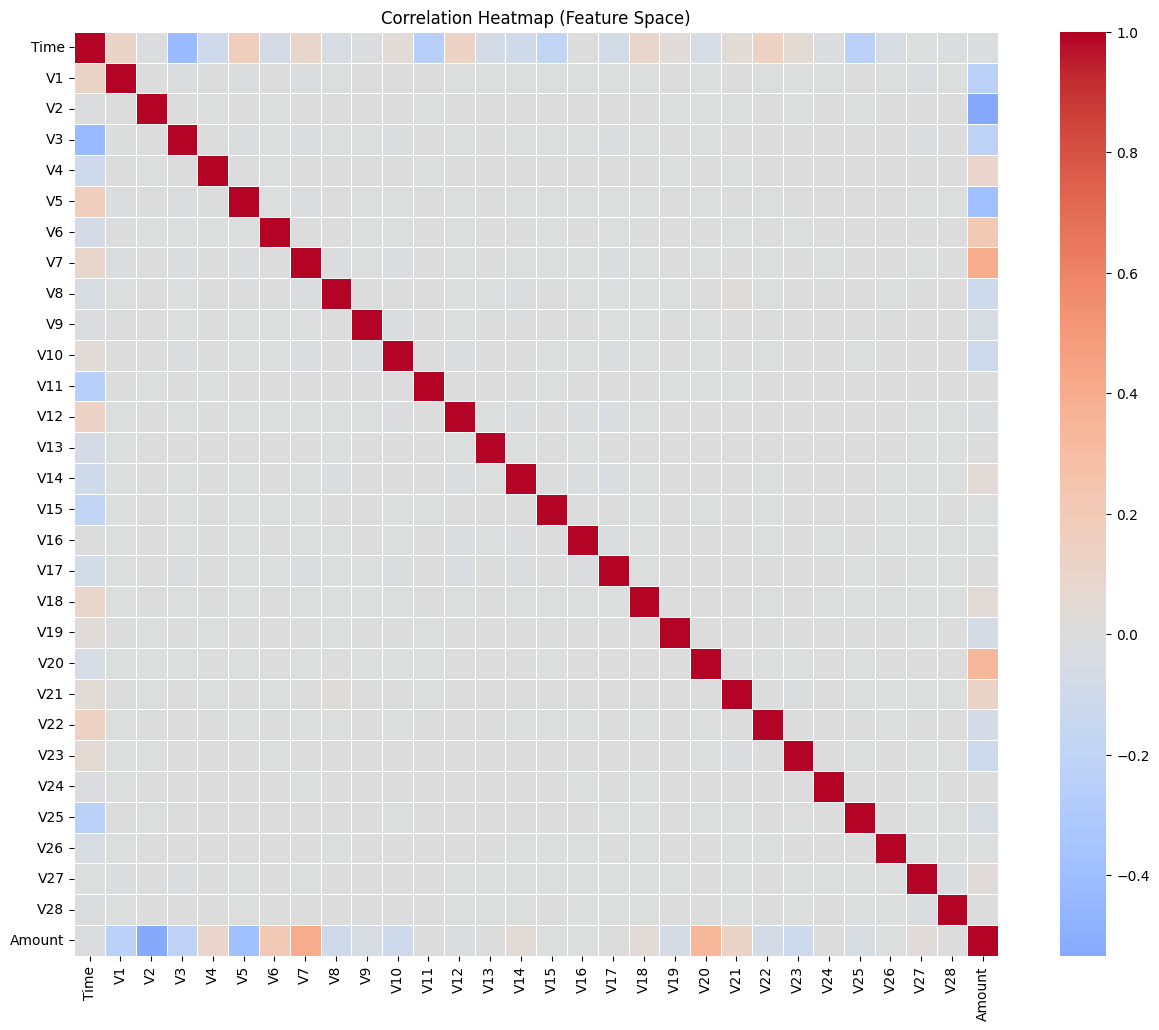

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load cleaned dataset
df = pd.read_csv('../data/creditcard_cleaned.csv')
print("Cleaned data loaded")

# Overview: class balance
print("Fraud distribution:\n", df['is_fraud'].value_counts(normalize=True))

# Separate feature columns
features = [col for col in df.columns if col not in ['is_fraud']]

# Histograms for all features
n = len(features)
cols = 4
rows = math.ceil(n / cols)

plt.figure(figsize=(20, 3 * rows))
for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(data=df, x=feature, bins=50)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

# Fraud vs. Non-Fraud boxplots for selected features
selected = ['V1', 'V2', 'V10', 'Amount']

for feature in selected:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='is_fraud', y=feature)
    plt.title(f'Boxplot of {feature} by Fraud Status')
    plt.show()

# Overlaid class distributions
for feature in selected:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='is_fraud', bins=50, stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} by Fraud Label')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(16, 12))
corr = df[features].corr()
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Correlation Heatmap (Feature Space)")
plt.show()
